In [1]:
import pandas as pd ######
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


%matplotlib inline

In [2]:
#İmport Data ####
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211204.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211211.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220115.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211225.txt')
df5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220101.txt')
df6 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220108.txt')
df7 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220115.txt')
df8 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220122.txt')
df9 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220129.txt')
df10 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220205.txt')
df11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220212.txt')
df12 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220219.txt')
df13 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220226.txt')
mta = pd.concat([df1, df2, df3, df4,df5,df6,df7,df8,df9,df10,df11,df12,df13])

### ***CLEANNING AND PREPARATION DATA***

In [3]:
# Eliminate spaces at columns names

mta.columns = mta.columns.str.strip()
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [4]:
#rename column headers
mta.rename(columns={'C/A'    :'ca',
                    'UNIT'    :'unit',
                    'SCP'     :'scp', 
                    'STATION' :'station',
                    'LINENAME':'linename',
                    'DIVISION':'division', 
                    'DATE'    :'date', 
                    'TIME'    :'time',
                    'DESC'    :'desc', 
                    'ENTRIES' :'entries',
                    'EXITS'   :'exits'
                    },inplace=True)

In [5]:
mta.columns

Index(['ca', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [12]:
#Removed division and line name columns with the drop function
mta=mta.drop(["division","linename"],axis=1)#axis= 1 sütun manasında
mta.head(2)

,ca,unit,scp,station,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,11/27/2021,03:00:00,REGULAR,7666542,2635798
1,A002,R051,02-00-00,59 ST,11/27/2021,07:00:00,REGULAR,7666546,2635803


In [13]:
# Create a datetime column with datetime object
# Convert date data to datetime object
 

mta['datetime'] = mta["date"]+ " " + mta["time"]
mta['datetime'] = pd.to_datetime(mta['datetime'], format='%m/%d/%Y %H:%M:%S')

# Create a day column

mta['day'] = mta['datetime'].dt.day_name()


# Create turnstile column as proxy for unique identifier
mta['turnstile']= mta['station']+'-'+mta['ca']+'-'+mta['unit']+'-'+mta['scp']

mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730661 entries, 0 to 209848
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   ca         object        
 1   unit       object        
 2   scp        object        
 3   station    object        
 4   date       object        
 5   time       object        
 6   desc       object        
 7   entries    int64         
 8   exits      int64         
 9   datetime   datetime64[ns]
 10  day        object        
 11  turnstile  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 270.8+ MB


# DATA VISUALIZATION

In [14]:
#Checking some columns value's counts

print("Row count based on Day ")
print(mta["day"].value_counts().sort_values(ascending=False).head(10))

Row count based on Day 
Thursday     391255
Tuesday      391243
Saturday     390414
Wednesday    390192
Monday       389515
Friday       389037
Sunday       389005
Name: day, dtype: int64


In [53]:
def plotBar(variable,n=7):
   
    mta_=mta[variable]
    mta_count=mta_.value_counts()
    mta_count=mta_count[:n]
    plt.figure()
    plt.bar(mta_count.index,mta_count,color="green")
    plt.xticks(mta_count.index,mta_count.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Total Observations- Frequency",fontweight="bold")
    plt.title("Data Frequency - {}".format(variable),fontweight="bold")
    plt.show()
    print("{}:\n {}".format(variable,mta_count))

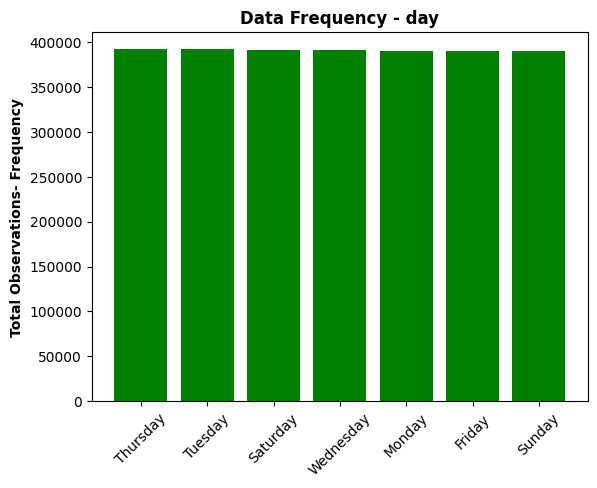

day:
 Thursday     391255
Tuesday      391243
Saturday     390414
Wednesday    390192
Monday       389515
Friday       389037
Sunday       389005
Name: day, dtype: int64


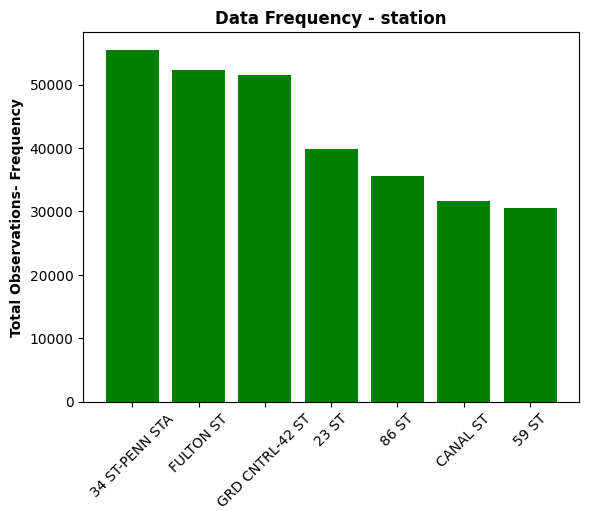

station:
 34 ST-PENN STA     55487
FULTON ST          52307
GRD CNTRL-42 ST    51487
23 ST              39911
86 ST              35539
CANAL ST           31680
59 ST              30593
Name: station, dtype: int64


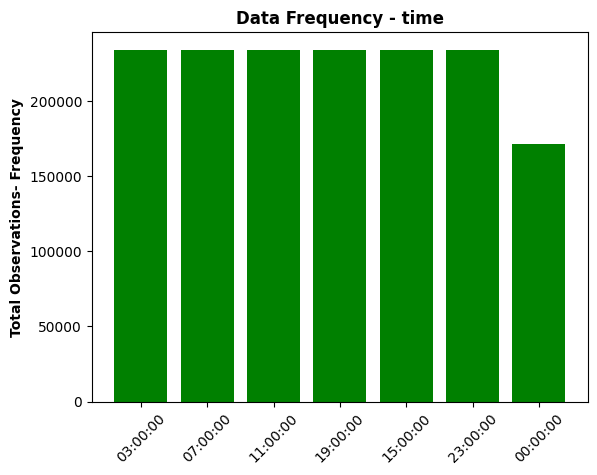

time:
 03:00:00    234119
07:00:00    234010
11:00:00    233985
19:00:00    233942
15:00:00    233937
23:00:00    233913
00:00:00    171520
Name: time, dtype: int64


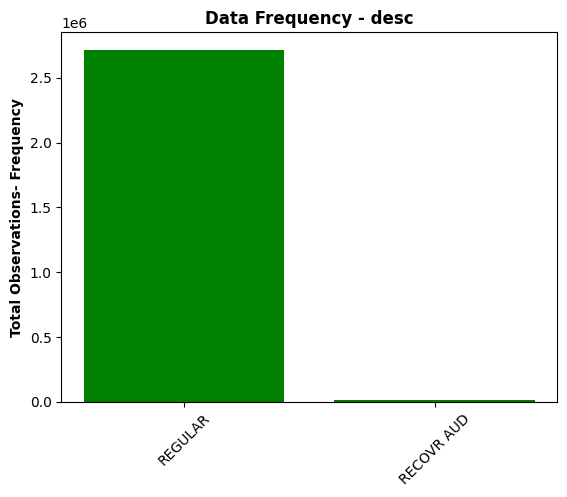

desc:
 REGULAR       2715960
RECOVR AUD      14701
Name: desc, dtype: int64


In [54]:
categorical_variable=["day","station","time","desc"]
for i in categorical_variable:
    plotBar(i)

In [17]:
turnstiles_daily = (mta.groupby(["ca", "unit", "scp", "station", "date","day","time"],as_index=False).entries.first())
turnstiles_daily.head(2)

,ca,unit,scp,station,date,day,time,entries
0,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,03:00:00,7675872
1,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,07:00:00,7675876


In [19]:
#Calculate the daily entries by using each day's entries to minus the previous date
turnstiles_daily[['date_prev', 'entries_prev']] = turnstiles_daily.groupby(['ca','unit','scp','station'])['date','entries'].shift(1)

#dropping top row of NaN's:
turnstiles_daily.dropna(subset=["date_prev"], axis=0, inplace=True)

# Where is the counter going the wrong way?
turnstiles_daily[turnstiles_daily["entries"] < turnstiles_daily["entries_prev"]].head()

# Fixing counter
def get_daily_counts(df, max_counter = 1500000):
    counter = df["entries_prev"] - df["entries"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        return 0
    return counter


# finally adding our daily entries column!
turnstiles_daily["daily_entries"] = turnstiles_daily.apply(get_daily_counts, axis = 1,max_counter=40000)

turnstiles_daily.head()

/var/folders/k6/6c48bzy96gv0yr5zmy6fd2km0000gp/T/ipykernel_3219/3890575969.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[['date_prev', 'entries_prev']] = turnstiles_daily.groupby(['ca','unit','scp','station'])['date','entries'].shift(1)


,ca,unit,scp,station,date,day,time,entries,date_prev,entries_prev,daily_entries
2,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,11:00:00,7675887,01/01/2022,7675876.0,11.0
3,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,15:00:00,7675895,01/01/2022,7675887.0,8.0
4,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,19:00:00,7675920,01/01/2022,7675895.0,25.0
5,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,23:00:00,7675936,01/01/2022,7675920.0,16.0
6,A002,R051,02-00-00,59 ST,01/02/2022,Sunday,03:00:00,7675940,01/01/2022,7675936.0,4.0


In [20]:
# Visualize the median of daily entries to obsevve the patterns of this metric

turnstiles_daily_copy = turnstiles_daily.groupby("date")["daily_entries"].median().reset_index()

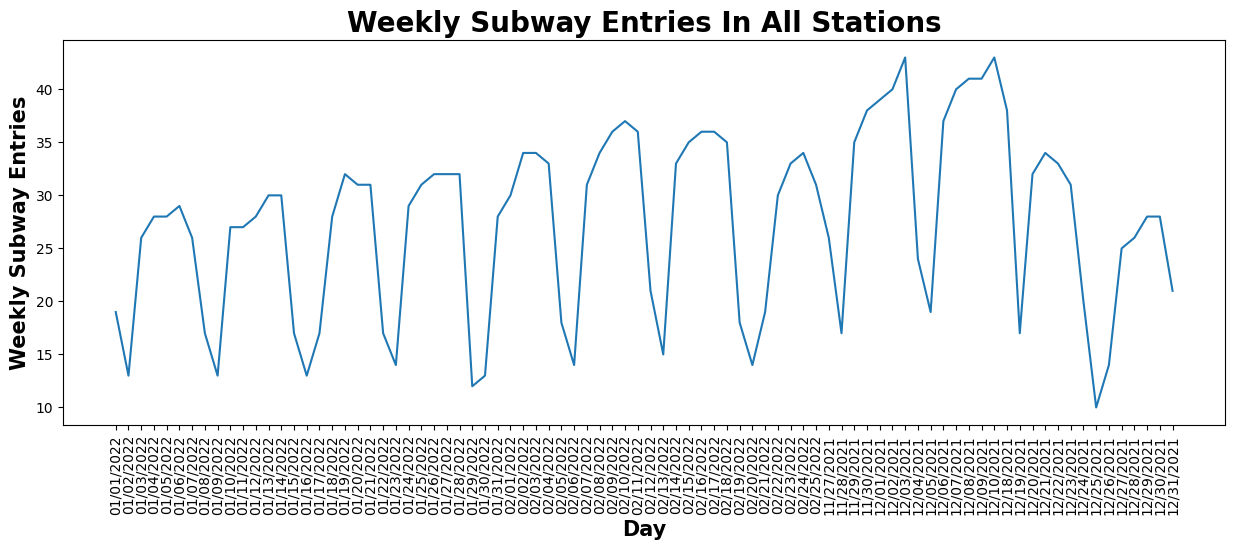

In [21]:
plt.figure(figsize = (15,5))
plt.plot(turnstiles_daily_copy.date, turnstiles_daily_copy.daily_entries)

plt.title("Weekly Subway Entries In All Stations",weight="bold",c="black",fontsize=20)
plt.xlabel("Day",weight="bold",c="black",fontsize=15)
plt.xticks(rotation=90) 
plt.ylabel("Weekly Subway Entries",weight="bold",c="black",fontsize=15);

In [22]:
# Avarage of the morning interval
turnstiles_daily[(turnstiles_daily["unit"]=="R293") & (turnstiles_daily["time"]> "06:00:00") & (turnstiles_daily["time"]< "15:00:00")]["daily_entries"].mean()


131.74148345010872

In [23]:
# Avarage of the morning interval
turnstiles_daily[(turnstiles_daily["unit"]=="R293") & (turnstiles_daily["time"]> "06:00:00") & (turnstiles_daily["time"]< "15:00:00")]["daily_entries"].mean()


131.74148345010872

In [24]:
ca_unit_station_daily = turnstiles_daily.groupby(["ca", "unit","station", "date","day"])[['daily_entries']].sum().reset_index()
ca_unit_station_daily.head()

,ca,unit,station,date,day,daily_entries
0,A002,R051,59 ST,01/01/2022,Saturday,1317.0
1,A002,R051,59 ST,01/02/2022,Sunday,1867.0
2,A002,R051,59 ST,01/03/2022,Monday,3917.0
3,A002,R051,59 ST,01/04/2022,Tuesday,4250.0
4,A002,R051,59 ST,01/05/2022,Wednesday,4327.0


In [25]:
station_daily = turnstiles_daily.groupby(["station","date","day"])[['daily_entries']].sum().reset_index()
station_daily.head()

,station,date,day,daily_entries
0,1 AV,01/01/2022,Saturday,2413.0
1,1 AV,01/02/2022,Sunday,3701.0
2,1 AV,01/03/2022,Monday,6844.0
3,1 AV,01/04/2022,Tuesday,7041.0
4,1 AV,01/05/2022,Wednesday,7354.0


In [32]:
top10_stations = (station_daily.groupby(['station'])['daily_entries'].sum()
                   .reset_index()
                   .sort_values(by='daily_entries',ascending=False) 
                   .station.head(10))

In [33]:
station_daily_top10 =station_daily[station_daily['station']
                    .isin(top10_stations)].sort_values(by = 'daily_entries', ascending = False)

Text(0.5, 1.0, '10 Busiest Subway Stations')

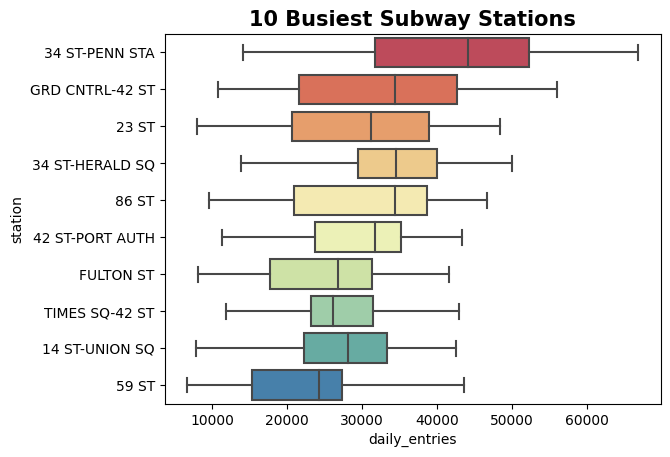

In [34]:
sns.boxplot(x='daily_entries', y='station', data=station_daily_top10, 
            order = top10_stations,palette="Spectral",
            showfliers = False).set_title('10 Busiest Subway Stations',
                                          size = 15,fontweight="bold")

In [35]:
print("Row count based on Day ")
print(station_daily_top10["station"].value_counts().sort_values(ascending=False).head(10))

Row count based on Day 
34 ST-PENN STA     84
23 ST              84
GRD CNTRL-42 ST    84
FULTON ST          84
86 ST              84
59 ST              84
TIMES SQ-42 ST     84
34 ST-HERALD SQ    84
14 ST-UNION SQ     84
42 ST-PORT AUTH    84
Name: station, dtype: int64


In [38]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
turnstiles_daily.to_sql("TD_t", con=engine)
mta_data = pd.read_sql('SELECT * FROM TD_t;', engine)
mta_data

,index,ca,unit,scp,station,date,day,time,entries,date_prev,entries_prev,daily_entries
0,2,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,11:00:00,7675887,01/01/2022,7675876.0,11.0
1,3,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,15:00:00,7675895,01/01/2022,7675887.0,8.0
2,4,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,19:00:00,7675920,01/01/2022,7675895.0,25.0
3,5,A002,R051,02-00-00,59 ST,01/01/2022,Saturday,23:00:00,7675936,01/01/2022,7675920.0,16.0
4,6,A002,R051,02-00-00,59 ST,01/02/2022,Sunday,03:00:00,7675940,01/01/2022,7675936.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2510794,2520855,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,Friday,04:00:00,5562,12/31/2021,5562.0,0.0
2510795,2520856,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,Friday,08:00:00,5562,12/31/2021,5562.0,0.0
2510796,2520857,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,Friday,12:00:00,5562,12/31/2021,5562.0,0.0
2510797,2520858,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/31/2021,Friday,16:00:00,5562,12/31/2021,5562.0,0.0


In [39]:
mta_dat = pd.read_sql('SELECT "ca", sum(daily_entries) FROM TD_t where station= "34 ST-PENN STA"group by "ca" order by sum(daily_entries) DESC ;', engine)
mta_dat.head(10)

,ca,sum(daily_entries)
0,R138,1308196.0
1,N067,809217.0
2,N072,529014.0
3,R141,443569.0
4,N073,329510.0
5,R135,325036.0
6,N070,290816.0
7,R142,271308.0
8,N071,265182.0
9,R139,194398.0


In [40]:
mta_da = pd.read_sql('SELECT "unit", sum(daily_entries) FROM TD_t where station= "34 ST-PENN STA" AND "ca"="R138" order by sum(daily_entries) DESC ;', engine)
mta_da.head

<bound method NDFrame.head of    unit  sum(daily_entries)
0  R293           1308196.0>

In [41]:
mask = ((turnstiles_daily["ca"] == "R138") & 
        (turnstiles_daily["unit"] == "R293") &
(turnstiles_daily["station"] == "34 ST-PENN STA"))

mask_table=turnstiles_daily[mask]
mask_table

,ca,unit,scp,station,date,day,time,entries,date_prev,entries_prev,daily_entries
1667449,R138,R293,00-00-00,34 ST-PENN STA,01/01/2022,Saturday,09:00:00,1423666,01/01/2022,1423569.0,97.0
1667450,R138,R293,00-00-00,34 ST-PENN STA,01/01/2022,Saturday,13:00:00,1423836,01/01/2022,1423666.0,170.0
1667451,R138,R293,00-00-00,34 ST-PENN STA,01/01/2022,Saturday,17:00:00,1424089,01/01/2022,1423836.0,253.0
1667452,R138,R293,00-00-00,34 ST-PENN STA,01/01/2022,Saturday,21:00:00,1424335,01/01/2022,1424089.0,246.0
1667453,R138,R293,00-00-00,34 ST-PENN STA,01/02/2022,Sunday,01:00:00,1424471,01/01/2022,1424335.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1676778,R138,R293,00-06-00,34 ST-PENN STA,12/31/2021,Friday,05:00:00,7860842,12/31/2021,7860829.0,13.0
1676779,R138,R293,00-06-00,34 ST-PENN STA,12/31/2021,Friday,09:00:00,7860851,12/31/2021,7860842.0,9.0
1676780,R138,R293,00-06-00,34 ST-PENN STA,12/31/2021,Friday,13:00:00,7860874,12/31/2021,7860851.0,23.0
1676781,R138,R293,00-06-00,34 ST-PENN STA,12/31/2021,Friday,17:00:00,7860948,12/31/2021,7860874.0,74.0


In [42]:
mask_table.to_sql("mask_tab", con=engine)

9298

In [43]:
mta_evn = pd.read_sql('SELECT time,daily_entries FROM mask_tab where time BETWEEN "16:00:00" AND "23:59:00" order by daily_entries Desc;', engine)

AVG_EVINING_DAILY_ENTRIES=mta_evn["daily_entries"].mean()
AVG_EVINING_DAILY_ENTRIES

119.48482892188508

In [44]:
mta_mor = pd.read_sql('SELECT time,daily_entries FROM mask_tab where time BETWEEN "06:00:00" AND "15:00:00" order by daily_entries Desc;', engine)

AVG_MORNING_DAILY_ENTRIES=mta_mor["daily_entries"].mean()
AVG_MORNING_DAILY_ENTRIES

159.29094964945824

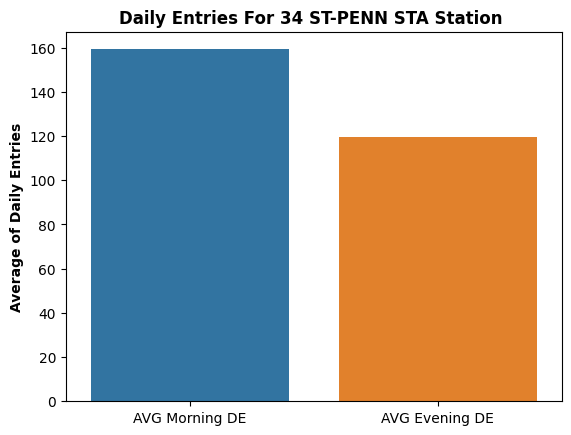

In [45]:
x_list=['AVG Morning DE',"AVG Evening DE"]
y_list=[AVG_MORNING_DAILY_ENTRIES,AVG_EVINING_DAILY_ENTRIES]
sns.barplot(x =x_list,y=y_list);
plt.title("Daily Entries For 34 ST-PENN STA Station ",weight="bold",c="black")
plt.ylabel("Average of Daily Entries",weight="bold",c="black");


#in 34 ST-PENN STA station of Average of Morning and Evening Daily Entries

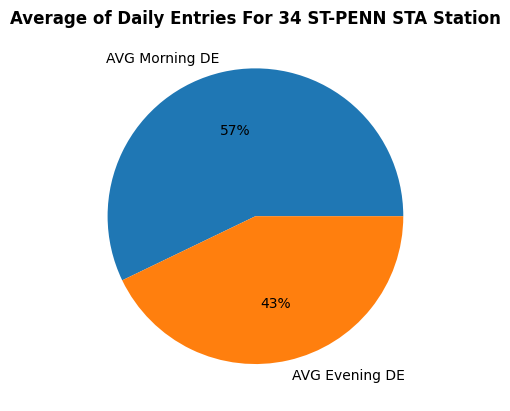

In [46]:
colors = sns.color_palette()
plt.pie(y_list, labels = x_list, colors = colors, autopct='%.0f%%')
plt.title("Average of Daily Entries For 34 ST-PENN STA Station",weight="bold",c="black")
plt.show()

In [47]:
# Function to get the unique DAY + DATE combination
def get_day(x):
    return f"{x.date()}_{x.day_name()}"

In [48]:
mta['day_date'] = mta['datetime'].apply(get_day)

In [49]:
mta_grouped = mta.groupby(['station','unit','scp','day','datetime','day_date'])['entries','exits'].agg(['max','min'])
mta_grouped.sort_values(('entries','max'),ascending=False).reset_index()

/var/folders/k6/6c48bzy96gv0yr5zmy6fd2km0000gp/T/ipykernel_3219/228459013.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_grouped = mta.groupby(['station','unit','scp','day','datetime','day_date'])['entries','exits'].agg(['max','min'])


station  unit       scp       day            datetime  \
                                                                         
0               HEWES ST  R352  00-00-00  Saturday 2021-11-27 00:00:00   
1               HEWES ST  R352  00-00-00  Saturday 2021-11-27 04:00:00   
2               HEWES ST  R352  00-00-00  Saturday 2021-11-27 08:00:00   
3               HEWES ST  R352  00-00-00  Saturday 2021-11-27 12:00:00   
4               HEWES ST  R352  00-00-00  Saturday 2021-11-27 16:00:00   
...                  ...   ...       ...       ...                 ...   
2520855     QUEENS PLAZA  R140  00-05-03    Sunday 2022-02-20 12:00:00   
2520856     QUEENS PLAZA  R140  00-05-03    Sunday 2022-02-20 16:00:00   
2520857     QUEENS PLAZA  R140  00-05-03    Sunday 2022-02-20 20:00:00   
2520858     QUEENS PLAZA  R140  00-05-03  Thursday 2021-12-02 00:00:00   
2520859  34 ST-HERALD SQ  R022  00-06-01  Saturday 2021-12-04 11:00:00   

                    day_date     entries                  exits             
                                     max         min        max        min  
0        2021-11-27_Saturday  2147350361  2147350361  671189981  671189981  
1        2021-11-27_Saturday  2147350353  2147350353  671189987  671189987  
2        2021-11-27_Saturday  2147350333  2147350333  671190000  671190000  
3        2021-11-27_Saturday  2147350285  2147350285  671190018  671190018  
4        2021-11-27_Saturday  2147350222  2147350222  671190045  671190045  
...                      ...         ...         ...        ...        ...  
2520855    2022-02-20_Sunday           0           0        625        625  
2520856    2022-02-20_Sunday           0           0        625        625  
2520857    2022-02-20_Sunday           0           0        625        625  
2520858  2021-12-02_Thursday           0           0        607        607  
2520859  2021-12-04_Saturday           0           0       3456       3456  

[2520860 rows x 10 columns]

In [50]:
# Group the sorted data and calculate ENTRIES & EXISTS for each element to create a summary dataframe
mta_entries = mta.groupby(['station','unit','scp','day','day_date','date']).entries.max() - mta.groupby(['station','unit','scp','day','day_date','date']).entries.min()
mta_entries = mta_entries.reset_index()

mta_exits = mta.groupby(['station','unit','scp','day','day_date','date']).exits.max() - mta.groupby(['station','unit','scp','day','day_date','date']).exits.min()
mta_exits = mta_exits.reset_index()

mta_entry_exit = pd.merge(left=mta_entries,right=mta_exits,on=['station','unit','scp','day','day_date','date'])
mta_entry_exit.isnull().sum()

mta_entry_exit.columns = ['station','unit','scp','day','day_date','date','entries_diff','exits_diff']
mta_entry_exit

,station,unit,scp,day,day_date,date,entries_diff,exits_diff
0,1 AV,R248,00-00-00,Friday,2021-12-03_Friday,12/03/2021,834,3198
1,1 AV,R248,00-00-00,Friday,2021-12-10_Friday,12/10/2021,839,3191
2,1 AV,R248,00-00-00,Friday,2021-12-24_Friday,12/24/2021,268,1062
3,1 AV,R248,00-00-00,Friday,2021-12-31_Friday,12/31/2021,273,1523
4,1 AV,R248,00-00-00,Friday,2022-01-07_Friday,01/07/2022,563,2356
...,...,...,...,...,...,...,...,...
420847,ZEREGA AV,R326,00-05-01,Wednesday,2022-01-26_Wednesday,01/26/2022,0,0
420848,ZEREGA AV,R326,00-05-01,Wednesday,2022-02-02_Wednesday,02/02/2022,0,0
420849,ZEREGA AV,R326,00-05-01,Wednesday,2022-02-09_Wednesday,02/09/2022,0,0
420850,ZEREGA AV,R326,00-05-01,Wednesday,2022-02-16_Wednesday,02/16/2022,0,0


In [51]:
mta_entry_exit['traffic'] = mta_entry_exit['entries_diff'] + mta_entry_exit['exits_diff']


In [52]:
mta_entry_exit.sort_values('traffic',ascending=False).head(30)


,station,unit,scp,day,day_date,date,entries_diff,exits_diff,traffic
11748,125 ST,R132,00-03-01,Friday,2022-01-21_Friday,01/21/2022,2022148801,1788166358,3810315159
65979,33 ST,R176,03-06-00,Saturday,2022-01-15_Saturday,01/15/2022,1995747840,57986,1995805826
298358,JACKSON AV,R405,00-00-02,Monday,2022-02-07_Monday,02/07/2022,1520745531,116946157,1637691688
193753,BOWLING GREEN,R041,01-05-00,Wednesday,2022-02-16_Wednesday,02/16/2022,1289819893,152764416,1442584309
410498,WEST FARMS SQ,R387,00-00-03,Tuesday,2021-12-07_Tuesday,12/07/2021,680,1056964724,1056965404
372143,QUEENS PLAZA,R140,01-06-00,Tuesday,2022-01-04_Tuesday,01/04/2022,59456,805287944,805347400
202022,BURNSIDE AV,R244,00-00-01,Tuesday,2021-12-28_Tuesday,12/28/2021,284117791,133692552,417810343
21003,14 ST-UNION SQ,R170,01-00-02,Thursday,2021-12-30_Thursday,12/30/2021,17675196,10694052,28369248
181109,BEACH 60 ST,R336,00-00-01,Saturday,2021-12-04_Saturday,12/04/2021,12553650,14133876,26687526
109097,52 ST,R327,00-00-01,Tuesday,2021-12-21_Tuesday,12/21/2021,9261272,4935931,14197203


### **DETECTING & TREATING OUTLIERS**